In [24]:
import numpy as np 
import pandas as pd 
from astropy.table import Table, Column
import matplotlib.pyplot as plt

In [25]:
def load_table(data_file, mjd_start, mask_date):
    # The code will automatically mask data mask_date days from the input reference date.
    # Change this value in order to adjust the amount of data that's included/excluded
    
    table = Table.read(data_file, format='ascii',names=('MJD','lum','dlum'))
    #print(table)
    # Want to fit versus a magnitude rather than actual luminosity, so convert lum to Mbol
    # Here 83.9605452803 = 2.5*log10(3.839e33) for Solar luminosity
    # 4.74 is bolometric luminosity of the Sun
    table['MJD'] = table['MJD']
    Mbol = -2.5*np.log10(table['lum']) + 83.9605452803 + 4.74
    Mbolerr = 1.086 * (table['dlum'] / table['lum'])

    
    table.add_column(Column(Mbol, name='Mbol'))
    table.add_column(Column(Mbolerr, name='Mbolerr'))
    
    newcol=Column(table['MJD'].data-mjd_start,name='t_exp')
    table.add_column(newcol)
    
    mask = table['t_exp']>mask_date
    table=table[mask]
    print(table)
    return(table)

In [26]:
def read_bol(filename):
    bol_lc = pd.read_csv(filename, sep = ' ')
    bol_lc = bol_lc.drop(columns=['Temp./1e3 (K)', 'Temp. Err.', 'Radius/1e15 (cm)', 'Radius Err.'])
    bol_file = filename.split('_')[0]
    bol_lc.to_csv(str(bol_file) + '_bol_LC.txt', sep = ' ', index=False)

In [27]:
def peak_L(filename):
    sn = load_table(filename, -50, 0)
    mjd = sn['MJD']
    lum = sn['lum']
    dlum = sn['dlum']
    yerr = (lum - dlum) / lum
    
    plt.figure()
    plt.errorbar(mjd[::5], lum[::5], yerr = yerr[::5])
    plt.ylabel('log(Lum)')
    plt.xlabel('Days from peak')
    plt.title(str(filename.split('_')[0]))
    
    peakL = np.max(lum)
    peakL_idx = np.argmax(lum)
    peakL_err = (peakL - sn['dlum'][peakL_idx]) / peakL 
    print(f'Peak L = {peakL} +/- {peakL_err}')

  MJD    lum    dlum         Mbol            Mbolerr             t_exp       
------- ------ ------ ----------------- ------------------ ------------------
-47.006 41.388   39.3 84.65835917926245 1.0312119454914468 2.9939999999999998
-46.002 41.424 39.345   84.657415197573 1.0314955098493628 3.9979999999999976
-44.997 41.398 39.279  84.6580968797891 1.0304119522682256              5.003
-43.993 41.407 39.288 84.65786086443057 1.0304240345835247  6.006999999999998
-42.989  41.41  39.26 84.65778220404404 1.0296150688239558  7.011000000000003
-41.984 41.414 39.233 84.65767733239278 1.0288076012942482  8.015999999999998
 -40.98 41.418 39.206 84.65757247087012 1.0280002897291034  9.020000000000003
-39.975 41.424 39.179   84.657415197573 1.0271435399768252 10.024999999999999
-38.971 41.429 39.155 84.65728415389249 1.0263904511332642 11.029000000000003
-37.967 41.425 39.181 84.65738898757155 1.0271711768255885 12.033000000000001
    ...    ...    ...               ...                ...      

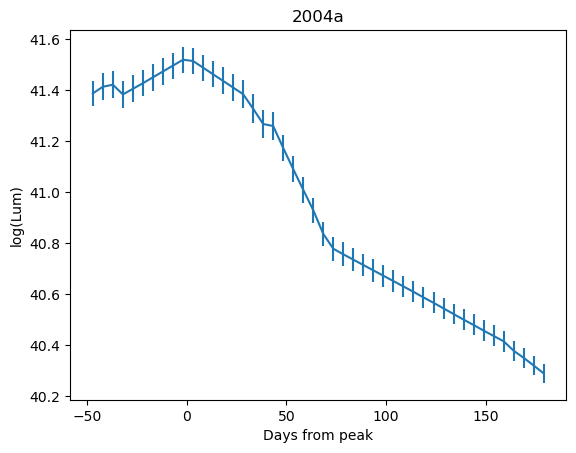

In [28]:
read_bol('2004a_2p.txt')
peak_L('2004a_bol_LC.txt')

  MJD    lum    dlum         Mbol            Mbolerr             t_exp       
------- ------ ------ ----------------- ------------------ ------------------
-48.968 40.321 37.751 84.68671704405897 1.0167799905756305 1.0319999999999965
-47.966 40.322 37.708 84.68669011707945 1.0155966469917166  2.033999999999999
-46.963 40.323 37.679 84.68666319076772 1.0147904173796594  3.036999999999999
-45.961 40.326  37.66 84.68658241583893 1.0142032435649457 4.0390000000000015
-44.959 40.328 37.655 84.68652856922476  1.014018299940488  5.040999999999997
-43.956 40.331  37.66 84.68644780431035 1.0140775086162008  6.043999999999997
-42.954 40.335 37.675 84.68634012710254 1.0143808107103012  7.045999999999999
-41.951 40.339 37.693 84.68623246057248 1.0147648181660427              8.049
-40.949 40.344 37.712  84.6860978924223  1.015150505651398  9.051000000000002
-39.947 40.349 37.731 84.68596334094867 1.0155360975488863 10.052999999999997
    ...    ...    ...               ...                ...      

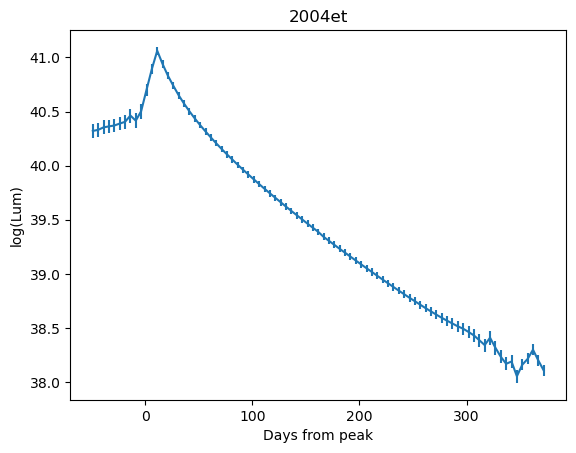

In [29]:
read_bol('2004et_2p.txt')
peak_L('2004et_bol_LC.txt')

  MJD    lum    dlum         Mbol            Mbolerr             t_exp       
------- ------ ------ ----------------- ------------------ ------------------
-48.877 41.373 39.056  84.6587527473259  1.025181060111667 1.1229999999999976
-47.872 41.381 39.031 84.65854282660509 1.0243267683236268              2.128
-46.868  41.39 39.006 84.65830671429809 1.0234480792461949  3.131999999999998
-45.864 41.398 38.979  84.6580968797891 1.0225420068602349  4.136000000000003
 -44.86 41.382 38.791 84.65851658936853 1.0180036247643904  5.140000000000001
-43.856 41.385 38.761 84.65843788146283 1.0171425878941647  6.143999999999998
-42.851 41.389 38.738 84.65833294646337 1.0164407934475344  7.149000000000001
-41.847 41.404  38.73 84.65793953051637  1.015862718577915  8.152999999999999
-40.843 41.406 38.708 84.65788708582589   1.01523663237212  9.156999999999996
-39.839 41.406  38.69 84.65788708582589 1.0147645268801624 10.161000000000001
    ...    ...    ...               ...                ...      

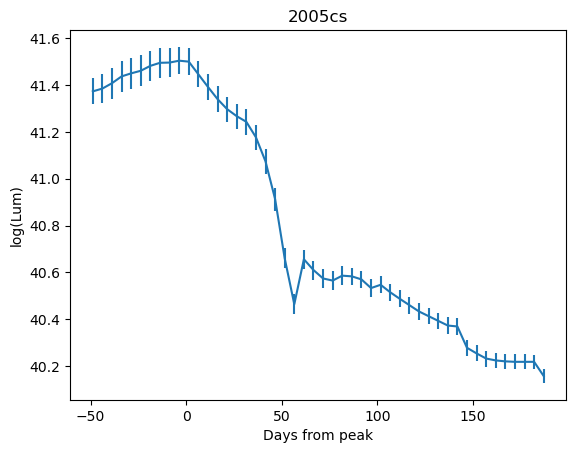

In [30]:
read_bol('2005cs_2p.txt')
peak_L('2005cs_bol_LC.txt')

  MJD    lum    dlum         Mbol            Mbolerr             t_exp       
------- ------ ------ ----------------- ------------------ ------------------
-34.909 41.404 39.496 84.65793953051637 1.0359544005410106 15.091000000000001
  -33.9 41.407 39.528 84.65786086443057 1.0367186224551406               16.1
-32.891 41.388 39.309 84.65835917926245 1.0314481008988112             17.109
-31.883 41.388 39.308 84.65835917926245 1.0314218614091042             18.117
-30.874 41.388 39.308 84.65835917926245 1.0314218614091042             19.126
-29.865 41.386 39.307 84.65841164676215 1.0314454646498816             20.135
-28.856 41.383 39.308 84.65849035276598 1.0315464804388275             21.144
-27.847 41.381 39.311 84.65854282660509 1.0316750682680458             22.153
-26.838 41.379 39.316 84.65859530298039  1.031856158921192             23.162
-25.829 41.378 39.322 84.65862154211919 1.0320385712214222             24.171
    ...    ...    ...               ...                ...      

Peak L = 41.422 +/- 0.051880643136497366


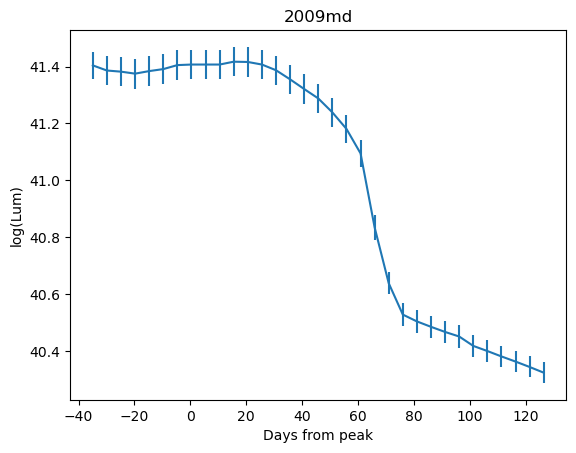

In [31]:
read_bol('2009md_2p.txt')
peak_L('2009md_bol_LC.txt')

  MJD    lum    dlum         Mbol            Mbolerr        t_exp 
------- ------ ------ ----------------- ------------------ -------
    0.0 41.978 39.804 84.64299092227188 1.0297571108675974    50.0
  1.006 41.997 39.577 84.64249960966116 1.0234212443745982  51.006
  2.013 41.999 39.545 84.64244790547501  1.022545060596681  52.013
  3.019 41.991 39.475 84.64265473699459 1.0209294848896193  53.019
  4.025 42.025 39.603 84.64177597502122  1.023411255205235  54.025
  5.031 42.073 39.604 84.64053657947109  1.022269483992109  55.031
  6.038 42.068 39.566 84.64066561718231 1.0214100028525246  56.038
  7.044 42.064 39.527 84.64076885839427 1.0205002377329784  57.044
   8.05 42.058 39.488 84.64092373862155 1.0196387845356414   58.05
  9.056  42.04 39.427 84.64138851190948 1.0184995718363463  59.056
    ...    ...    ...               ...                ...     ...
150.938 40.876 39.612 84.67187430410041 1.0524178491046092 200.938
151.944 40.873 39.617 84.67195399213612 1.0526279450982312 201

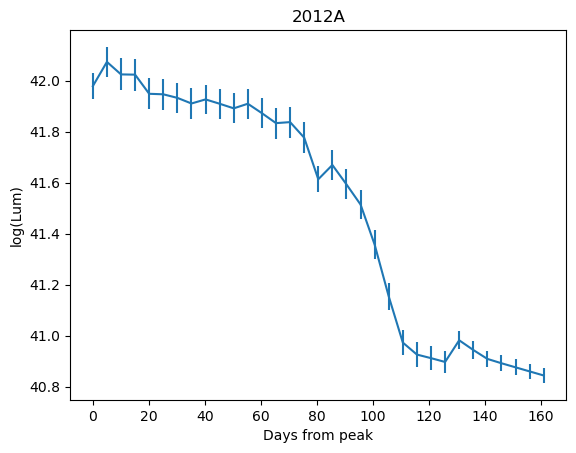

In [33]:
read_bol('2012A_2p.txt')
peak_L('2012A_bol_LC.txt')

  MJD    lum    dlum         Mbol            Mbolerr             t_exp       
------- ------ ------ ----------------- ------------------ ------------------
-45.918 42.134 39.875 84.63896355299882 1.0277744814164333  4.082000000000001
-44.914 42.132 39.842 84.63901509151755 1.0269726573625748 5.0859999999999985
 -43.91 42.129 39.812 84.63909240388307 1.0262724489069288  6.090000000000003
-42.905 42.127 39.785 84.63914394851871 1.0256251335248179  7.094999999999999
-41.901 42.126 39.763  84.6391697217542 1.0250823244552059  8.098999999999997
-40.897 42.124 39.743 84.63922127006066  1.024615373658722  9.103000000000002
-39.893 42.124 39.727 84.63922127006066 1.0242028772196372             10.107
-38.889 42.117 39.709   84.639401708409  1.023908967875205 11.110999999999997
-37.884 42.111 39.694 84.63955639372124 1.0236680202322437             12.116
 -36.88 42.108 39.683 84.63963374464241 1.0234572527785695 13.119999999999997
    ...    ...    ...               ...                ...      

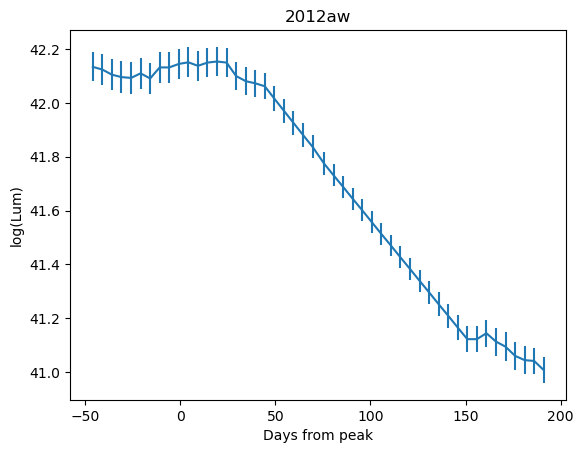

In [40]:
read_bol('2012aw_2p.txt')
peak_L('2012aw_bol_LC.txt')

  MJD    lum    dlum         Mbol            Mbolerr             t_exp       
------- ------ ------ ----------------- ------------------ ------------------
 -44.89 42.502 40.919 84.62952186290791  1.045551597571879  5.109999999999999
-43.883 42.202 40.211 84.63721269742295  1.034764845267997  6.116999999999997
-42.876 42.182 40.147 84.63772736192101 1.0336077473803993  7.124000000000002
-41.869 42.145 39.968 84.63868013486808 1.0299026693557956              8.131
-40.862 42.144 39.946 84.63870589709576  1.029360193621868  9.137999999999998
-39.854 42.112 39.725 84.63953061130539 1.0244431515957448             10.146
-38.847 42.116 39.746   84.639427487764 1.0248873587235257 11.152999999999999
 -37.84 42.103 39.684 84.63976267509165 1.0236045887466452 12.159999999999997
-36.833 42.091 39.624  84.6400721706506 1.0223483405003446 13.167000000000002
-35.825  42.08 39.574 84.64035595243578 1.0213251901140685 14.174999999999997
    ...    ...    ...               ...                ...      

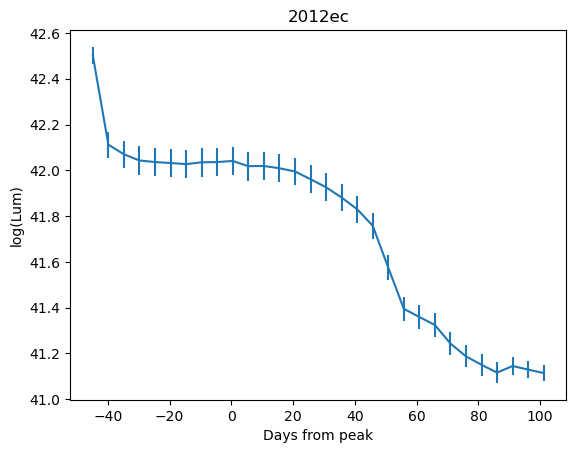

In [35]:
read_bol('2012ec_2p.txt')
peak_L('2012ec_bol_LC.txt')

  MJD    lum    dlum         Mbol            Mbolerr             t_exp       
------- ------ ------ ----------------- ------------------ ------------------
-16.926 42.518 40.707 84.62911321130873 1.0397432146385062             33.074
 -15.92 42.517 40.607 84.62913874752805 1.0372133969941435              34.08
-14.913 42.523 40.523 84.62898553922045 1.0349217599887122             35.087
-13.907 42.537  40.48 84.62862813722177 1.0334833204034135             36.093
-12.901 42.524 40.428 84.62896000660425 1.0324712632866146 37.099000000000004
-11.894 42.511  40.39 84.62929197745794 1.0318162357977936             38.106
-10.888 42.499 40.366 84.62959850220899 1.0314942939833878             39.112
 -9.881 42.488 40.352 84.62987955927228 1.0314035021653174             40.119
 -8.875 42.478 40.347 84.63013512884359 1.0315184801544328             41.125
 -7.868 42.469 40.348 84.63036519290422  1.031762650403824             42.132
    ...    ...    ...               ...                ...      

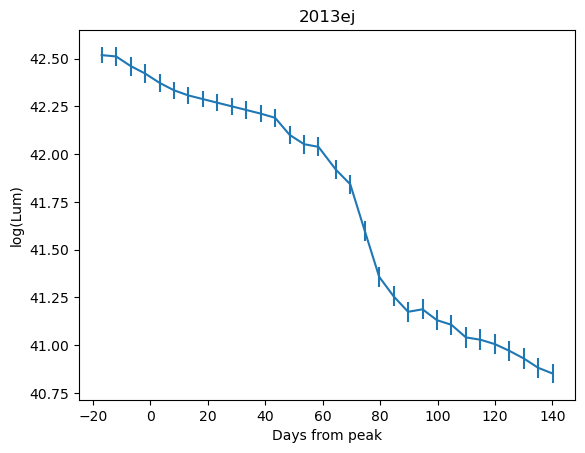

In [38]:
read_bol('2013ej_2p.txt')
peak_L('2013ej_bol_LC.txt')

In [ ]:
peak_Ls = [41.531, 41.115, 41.511, 41.422, 42.073, 42.154, 42.502, 42.532]
errs = [0.05, 0.04, 0.06, 0.05, 0.06, 0.06, 0.04, 0.05]